In [4]:
from sklearn.datasets import fetch_california_housing

import pandas as pd

In [5]:
data = fetch_california_housing(as_frame=True)
df = data.frame

In [6]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [8]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [9]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


* Correlation refers to a stastical relationship between two variables 
* Values lie between -1 and 1 
* 1 indicates perfect positive correlation
* -1 indicates perfect negative correlation 
* 0 indicated no correlation 
* Positive correlation means they tend to move in the same direction 
* Negative correlation means they tend to move in opposite direction 
* Correlation does not imply causation

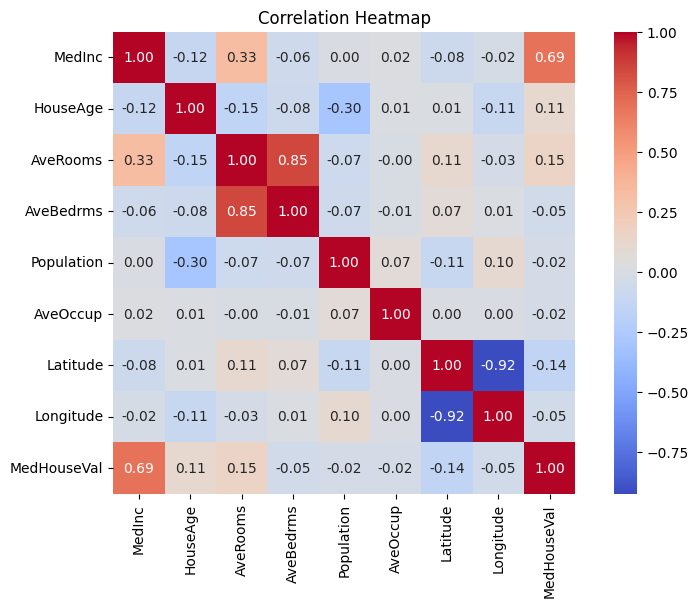

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
corr_matrix= df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

In [11]:
df.corr()['MedHouseVal'].sort_values(ascending=False)


MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64

* This step is done for feature selection 
* We can select the features that show a significant correlation with the target variables and can drop the weakly correlated 

In [12]:
X=df.drop(columns='MedHouseVal')
y=df['MedHouseVal']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

y_pred = model.predict(X_test)

In [22]:
#Actual Y values in dummy example 
# dummy_y = [2,4,5,4,5]
# dummy_predicted = [2.8, 3.4, 4.0, 4.6, 5.2]

# dummy_r2 = r2_score(dummy_y, dummy_predicted)
# print("Dummy R^2 Score:", dummy_r2)

* R^2 = 1-(SS_Res/SS_Tot) where 
    * SS_Res = ∑(y_i - y_pred_i)^2 this is residual sum of squares
    * SS_Tot = ∑(y_i - y_mean)^2 this is total sum of squares
* R^2 represents the percentage of variance in the target explained by the model 

In [17]:
print("R^2 Score for model:", r2_score(y_test, y_pred))

R^2 Score for model: 0.5757877060324517


* Our model explains 57% of the variance in the target
* R^2 equals 1 means perfect prediction 
* R^2 equals 0 means that the model is not better than predicting the mean 

In [ ]:
print("MSE for model:", mean_squared_error(y_test, y_pred))

MSE Score for model: 0.5558915986952433


* MSE = (1/n) * ∑(y_i - y_pred_i)^2 

In [ ]:
print("MAE for model:", mean_absolute_error(y_test, y_pred))

MAE Score for model: 0.5332001304956561


* MAE = (1/n) * ∑|y_i - y_pred_i|

In [20]:
print("RMSE for model:", np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE for model: 0.7455813830127757


* RMSE = Square Root of (1/n) * ∑(y_i - y_pred_i)^2 

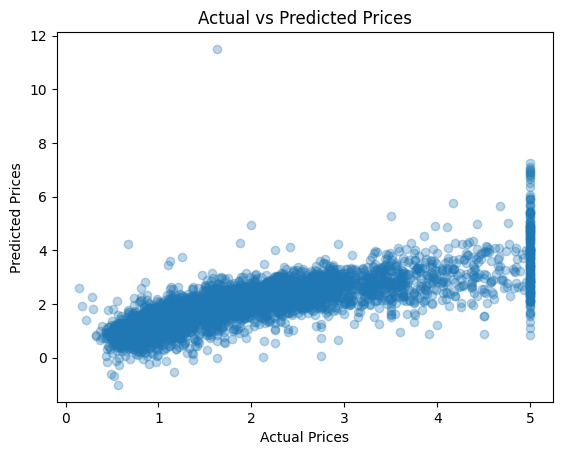

In [21]:
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

* Most points form a diagonal trend from bottom left to top right 
* Higher actual valuues => higher predictions 
* The spread is fairly tight in the middle
* Most predictions are close to the actual prices in the common range 
* The model is underpredicting higher priced houses becuase the target variable, MedHouseVal is capped at 5.0 in the dataset 
* There are some outliers, for instance the actual price is between 1 and 2 but the predicted price is between 10 and 12